In [12]:
from Bio import Phylo

In [13]:
tree = Phylo.read('tree.nwk', 'newick')

In [14]:
print(tree)

Tree(rooted=False, weight=1.0)
    Clade()
        Clade(branch_length=0.00408, name='hu.39')
        Clade(branch_length=0.00135, name='rh.50')
        Clade(branch_length=0.00055, confidence=0.744)
            Clade(branch_length=0.00055, confidence=0.684)
                Clade(branch_length=0.00057, confidence=0.881)
                    Clade(branch_length=0.00358, name='rh.57')
                    Clade(branch_length=0.00265, name='rh.51')
                Clade(branch_length=0.00317, name='rh.49')
            Clade(branch_length=0.00055, confidence=0.0)
                Clade(branch_length=0.00055, confidence=0.963)
                    Clade(branch_length=0.00135, name='rh.53')
                    Clade(branch_length=0.0009, name='rh.64')
                Clade(branch_length=0.00055, confidence=0.743)
                    Clade(branch_length=0.00055, confidence=0.852)
                        Clade(branch_length=0.00201, name='rh.61')
                        Clade(branch_length=0.00174

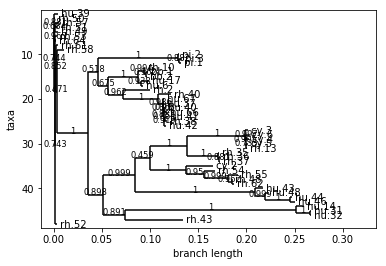

In [17]:
Phylo.draw(tree)

In [18]:
from Bio import SeqIO

In [36]:
for record in SeqIO.parse("seqs.fa", "fasta"):
    print(record.id + "\n\n" + record.seq + "\n\n")

bb.1

atggctgccgatggttatcttccagattggctcgaggacaacctctctgagggcattcgcgagtggtgggcgctgaaacctggagccccgaagcccaaagccaaccagcaaaagcaggacgacggccggggtctggtgcttcctggctacaagtacctcggacccttcaacggactcgacaagggggagcccgtcaacgcggcggacgcagcggccctcgagcacgacaaggcctacgaccagcagctcaaagcgggtgacaatccgtacctgcggtataaccacgccgacgccgagtttcaggagcgtctgcaagaagatacgtcttttgggggcaacctcggacgagcagtcttccaggccaagaagcgggttctcgaacctctcggtctggttgaggaaggcgctaagacggctcctggaaagaagagaccggtagagccatcaccccagcgttctccagactccactacgggcatcggcaagaaaggccagcagcccgcgaaaaagagactcaactttgggcagactggcgactcagagtcagtgcccgaccctcaaccaatcggagaaccccccgcaggcccctctggtctgggatctggtacaatggctgcaggcggtggcgctccaatggcagacaataacgaaggcgccgacggagtgggtagttcctcaggaaattggcattgcgattccacatggctgggcgacagagtcatcaccaccagcacccgaacctgggccctccccacctacaacaaccacctctacaagcaaatctccaacgggacttcgggaggaagcaccaacgacaacacctacttcggctacagcaccccctgggggtattttgactttaacagattccactgccacttctcaccacgtgactggcagcgactcatcaacaacaactggggattccggcccaagagactcaacttcaagctcttcaacatccaggtcaaggaggtcacgcagaatgaaggca

rh.64 blast matches with Adeno-associated virus isolate rh.64 capsid protein VP1 (cap) gene. Sequence ID: AY530574.1 Length: 2217. Looks very well aligned.

cy.5  Non-human primate Adeno-associated virus isolate AAVcy.5 capsid protein (VP1) gene, complete cds Sequence ID: AY243017.1 Length: 2187

In [30]:
record.next()

AttributeError: 'generator' object has no attribute 'next'